In [1]:
#Importing required Python packages 
import matplotlib.pylab as plt 
import numpy as np 
%matplotlib inline 

import torch
import torch.nn.functional as F

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5
x = x[:, np.newaxis]
y = y[:, np.newaxis]

inp  = np.c_[x,y]

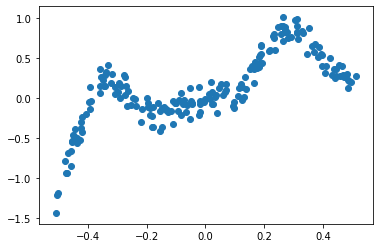

In [3]:
plt.scatter(x, y)

In [33]:
# defining network
X = torch.from_numpy(inp).type(torch.float32)

pieces = 3
We1 = torch.empty(2,pieces, requires_grad=True)
be1 = torch.zeros(pieces, requires_grad=True)
We2 = torch.empty(pieces,1, requires_grad=True)
be2 = torch.zeros(1, requires_grad=True)


Wd1 = torch.empty(1,pieces, requires_grad=True)
bd1 = torch.zeros(pieces, requires_grad=True)
Wd2 = torch.empty(pieces,2, requires_grad=True)
bd2 = torch.zeros(2, requires_grad=True)

torch.nn.init.xavier_normal_(We1)
torch.nn.init.xavier_normal_(We2)
torch.nn.init.xavier_normal_(Wd1)
torch.nn.init.xavier_normal_(Wd2)

alpha = 0.003
optimizer = torch.optim.Adam(params=[We1,We2,Wd1, Wd2, be1, be2, bd1, bd2], lr=alpha)

In [34]:
act = torch.relu
# act = torch.tanh

def encode(x):
    h = x.mm(We1) + be1
    h = act(h)
    h = h.mm(We2) + be2
    return h

def decode(h):
    h_ = h.mm(Wd1) + bd1
    h_ = act(h_)
    h_ = h_.mm(Wd2) + bd2
    return h_

def forward(x):
    h = encode(x)
    h_ = decode(h)
    return h_

In [35]:
%matplotlib tk
fig = plt.figure()
fig.show()

for i in range(100000):
    X_ = forward(X)
    
    optimizer.zero_grad()
    loss = F.mse_loss(X_, X)
    loss.backward()
    optimizer.step()
    
    if i%100 == 0:
        print('loss = ',loss)
        fig.clear()
        xx = forward(X)
        plt.scatter(x,y)
        plt.scatter(xx.data.numpy()[:,0],xx.data.numpy()[:,1] , lw=1, marker='*', c='r')
        fig.canvas.draw()
        plt.pause(0.01)

loss =  tensor(0.1457, grad_fn=<MseLossBackward>)
loss =  tensor(0.0389, grad_fn=<MseLossBackward>)
loss =  tensor(0.0167, grad_fn=<MseLossBackward>)
loss =  tensor(0.0141, grad_fn=<MseLossBackward>)
loss =  tensor(0.0114, grad_fn=<MseLossBackward>)
loss =  tensor(0.0108, grad_fn=<MseLossBackward>)
loss =  tensor(0.0106, grad_fn=<MseLossBackward>)
loss =  tensor(0.0104, grad_fn=<MseLossBackward>)
loss =  tensor(0.0103, grad_fn=<MseLossBackward>)
loss =  tensor(0.0101, grad_fn=<MseLossBackward>)
loss =  tensor(0.0099, grad_fn=<MseLossBackward>)
loss =  tensor(0.0099, grad_fn=<MseLossBackward>)
loss =  tensor(0.0098, grad_fn=<MseLossBackward>)
loss =  tensor(0.0098, grad_fn=<MseLossBackward>)
loss =  tensor(0.0098, grad_fn=<MseLossBackward>)
loss =  tensor(0.0097, grad_fn=<MseLossBackward>)
loss =  tensor(0.0097, grad_fn=<MseLossBackward>)
loss =  tensor(0.0097, grad_fn=<MseLossBackward>)
loss =  tensor(0.0096, grad_fn=<MseLossBackward>)
loss =  tensor(0.0096, grad_fn=<MseLossBackward>)


TclError: invalid command name "pyimage200"

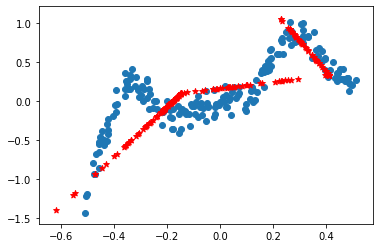

In [36]:
%matplotlib inline
xx = forward(X)
plt.scatter(x,y)
plt.scatter(xx.data.numpy()[:,0],xx.data.numpy()[:,1] , lw=1, marker='*', c='r')

In [ ]:
# plt.axis('equal')
plt.scatter(x, y)
for xxo, yyo, xxPred, yyPred in zip(x, y, xx.data.numpy()[:,0],xx.data.numpy()[:,1]):
    plt.plot([xxo,xxPred], [yyo, yyPred])
    
plt.scatter(xx.data.numpy()[:,0],xx.data.numpy()[:,1] , lw=1, marker='*', c='r')
plt.show()
# print(b_) # the relu creates zero below some value, to accomodate error, the decoding bias achieves value as below:

In [ ]:
print(bd2)

In [ ]:
h = encode(X)
plt.scatter(x,y)
plt.scatter(x,h.data.numpy() , lw=1, marker='.')